In [93]:
import pandas as pd
import numpy as np
# pip install python-ta
import python_ta as pta
import os
import matplotlib.pyplot as plt

In [5]:
main_directory_crypto = 'klines/crypto/'

In [13]:
def file_list(source):
    res = []
    for root, dirnames, filenames in os.walk(source):
        for filename in filenames:
            if filename.endswith('.csv'):
                res.append(os.path.join(root, filename))
    return res

In [14]:
all_files = file_list(main_directory_crypto)

In [20]:
# later to loop through all files
print(len(all_files))
for file in all_files:
    df = pd.read_csv(file)
    print(f"{file.split('/')[-1].split('.')[0]} - {df.shape[0]}")

927
RUNEUSDT - 1006
RLCUSDT - 1006
RADBTC - 862
REPUSDT - 923
RLCBTC - 1006
RIFBTC - 1006
ROSEUSDT - 1006
RIFUSDT - 1006
RCNBTC - 999
RVNUSDT - 1006
RPLUSDT - 394
RVNBTC - 1006
REQUSDT - 910
RONINUSDT - 11
REQBTC - 1006
ROSEBTC - 1006
RDNTUSDT - 323
RGTUSDT - 129
RAMPBTC - 469
RENUSDT - 1006
RDNTBTC - 323
RUNEBTC - 1006
RNDRBTC - 811
RENBTC - 1006
RNDRUSDT - 811
RPXBTC - 184
RONINBTC - 11
RSRBTC - 627
REEFUSDT - 1006
RDNBTC - 999
RPLBTC - 352
RAREBTC - 858
REEFBTC - 513
RGTBTC - 129
RENBTCBTC - 518
RAREUSDT - 858
REPBTC - 999
RAYUSDT - 920
REIUSDT - 653
RADUSDT - 862
RSRUSDT - 1006
RAMPUSDT - 469
UMAUSDT - 1006
USTCUSDT - 343
USDSUSDT - 496
UTKUSDT - 1006
UFTUSDT - 336
USTUSDT - 140
UNFIBTC - 1006
USDPUSDT - 724
UNIBTC - 1006
UMABTC - 1006
USDSBUSDT - 95
UNIDOWNUSDT - 449
UNIUPUSDT - 449
USTBTC - 119
UNIUSDT - 1006
UTKBTC - 1006
UNFIUSDT - 1006
USDCUSDT - 1006
IDEXBTC - 1006
IMXUSDT - 767
IOTXUSDT - 1006
IRISUSDT - 1006
INJBTC - 1006
ILVBTC - 877
IMXBTC - 767
IOSTBTC - 1006
INJUSDT - 1

In [72]:
# for now feature extraction for one ticker
s = 'klines/crypto/I/INJBTC.csv'
df = pd.read_csv(s)

# remove duplicate row if exists
# time is unique, remove if same exists
# sort df as per time column, increasing


In [29]:
# SIMPLE MOVING AVERAGE

# let's create simple moving averages, this ex for 20 day moving average
# most tracked moving averages are: [10, 20, 50, 100, 200]
# later, we will create columns for each period
df['20sma'] = df['close'].rolling(window=20).mean()

In [33]:
# next for each moving average, how far current price extended in percentage
df['20sma%'] = round((df['close'] - df['20sma']) / df['20sma'] * 100, 2)

In [34]:
df

,time,open,high,low,close,volume,20sma,20sma%
0,2021-05-16,0.000347,0.000372,0.000335,0.000341,108.70,NaN,NaN
1,2021-05-17,0.000341,0.000345,0.000324,0.000333,78.02,NaN,NaN
2,2021-05-18,0.000333,0.000435,0.000326,0.000420,191.64,NaN,NaN
3,2021-05-19,0.000420,0.000421,0.000272,0.000320,172.65,NaN,NaN
4,2021-05-20,0.000321,0.000336,0.000289,0.000319,71.39,NaN,NaN
...,...,...,...,...,...,...,...,...
1001,2024-02-11,0.000731,0.000760,0.000723,0.000728,19.62,0.000784,-7.17
1002,2024-02-12,0.000728,0.000744,0.000705,0.000737,27.62,0.000780,-5.51
1003,2024-02-13,0.000736,0.000743,0.000696,0.000697,22.18,0.000773,-9.93
1004,2024-02-14,0.000697,0.000707,0.000670,0.000684,30.96,0.000768,-10.91


<Axes: >

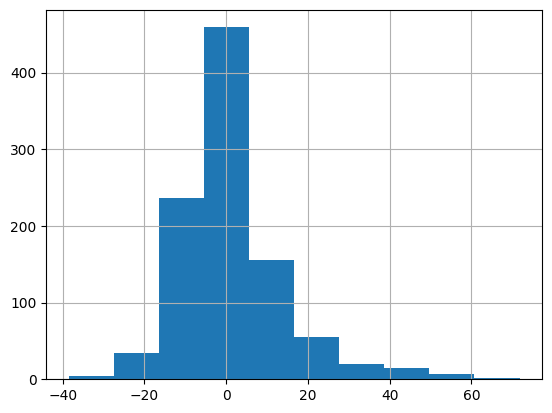

In [40]:
# distribution of percentage
df['20sma%'].hist()

In [41]:
# EXPONENTIAL MOVING AVERAGE

# let's create exponential moving averages, this ex for 20 day exponential moving average
# let's keep the same periods as well: [10, 20, 50, 100, 200]
# later, we will create columns for each period

df['20ema'] = df['close'].ewm(span=20, adjust=False).mean()

In [42]:
df

,time,open,high,low,close,volume,20sma,20sma%,20ema
0,2021-05-16,0.000347,0.000372,0.000335,0.000341,108.70,NaN,NaN,0.000341
1,2021-05-17,0.000341,0.000345,0.000324,0.000333,78.02,NaN,NaN,0.000340
2,2021-05-18,0.000333,0.000435,0.000326,0.000420,191.64,NaN,NaN,0.000348
3,2021-05-19,0.000420,0.000421,0.000272,0.000320,172.65,NaN,NaN,0.000345
4,2021-05-20,0.000321,0.000336,0.000289,0.000319,71.39,NaN,NaN,0.000343
...,...,...,...,...,...,...,...,...,...
1001,2024-02-11,0.000731,0.000760,0.000723,0.000728,19.62,0.000784,-7.17,0.000777
1002,2024-02-12,0.000728,0.000744,0.000705,0.000737,27.62,0.000780,-5.51,0.000774
1003,2024-02-13,0.000736,0.000743,0.000696,0.000697,22.18,0.000773,-9.93,0.000766
1004,2024-02-14,0.000697,0.000707,0.000670,0.000684,30.96,0.000768,-10.91,0.000758


<Axes: >

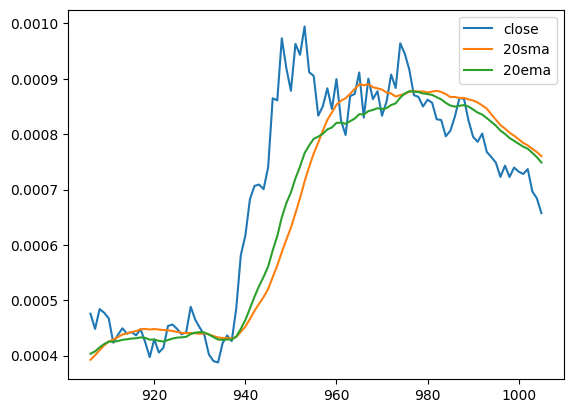

In [46]:
# plot SMA and EMA for last 100 days
df.tail(100)[['close', '20sma', '20ema']].plot()

In [47]:
# how far is price extended from ema
df['20ema%'] = round((df['close'] - df['20ema']) / df['20ema'] * 100, 2)

<Axes: >

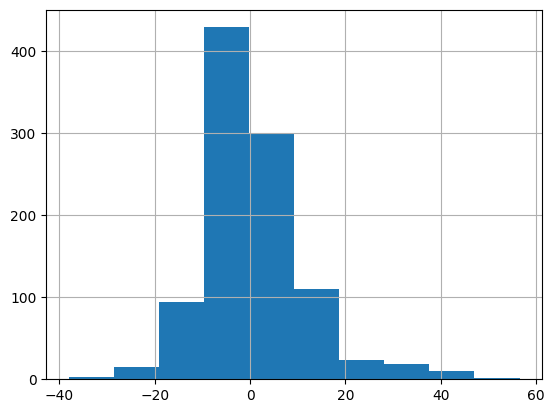

In [48]:
# distribution of EMA percentage
df['20ema%'].hist()

# both SMA and EMA % have bell curve distribution, we might face outliers here, may be limit 100% as max value

In [49]:
df

,time,open,high,low,close,volume,20sma,20sma%,20ema,20ema%
0,2021-05-16,0.000347,0.000372,0.000335,0.000341,108.70,NaN,NaN,0.000341,0.00
1,2021-05-17,0.000341,0.000345,0.000324,0.000333,78.02,NaN,NaN,0.000340,-2.11
2,2021-05-18,0.000333,0.000435,0.000326,0.000420,191.64,NaN,NaN,0.000348,20.62
3,2021-05-19,0.000420,0.000421,0.000272,0.000320,172.65,NaN,NaN,0.000345,-7.40
4,2021-05-20,0.000321,0.000336,0.000289,0.000319,71.39,NaN,NaN,0.000343,-6.79
...,...,...,...,...,...,...,...,...,...,...
1001,2024-02-11,0.000731,0.000760,0.000723,0.000728,19.62,0.000784,-7.17,0.000777,-6.35
1002,2024-02-12,0.000728,0.000744,0.000705,0.000737,27.62,0.000780,-5.51,0.000774,-4.74
1003,2024-02-13,0.000736,0.000743,0.000696,0.000697,22.18,0.000773,-9.93,0.000766,-9.09
1004,2024-02-14,0.000697,0.000707,0.000670,0.000684,30.96,0.000768,-10.91,0.000758,-9.81


In [69]:
# AVERAGE TRUE RANGE
"""
7-period ATR: Some traders prefer shorter periods for more sensitive volatility readings, especially in shorter timeframes or when trading more volatile cryptocurrencies.
10-period ATR: This period strikes a balance between sensitivity to recent price action and smoothing out short-term fluctuations.
14-period ATR: This is a widely used default period for calculating the ATR. It's commonly used by traders across different markets and timeframes.
20-period ATR: This longer period is preferred by some traders, especially those focusing on longer-term trends or trading less volatile assets.
30-period ATR: Similar to the 20-period ATR, this longer period is favored by traders looking for a broader view of volatility, particularly in longer-term analysis.
"""
# so, our periods will be [7, 10, 14, 20, 30]
# ATR for 14 example

def wwma(values, n):
    """
     J. Welles Wilder's EMA
    """
    return values.ewm(alpha=1 / n, adjust=False).mean()

In [74]:
# to compute atr, we will create tr0, tr1, tr2 and tr columns first
# after extracting ATR for each period, we can drop columns tr0, tr1, tr2 and tr

high = df['high']
low = df['low']
close = df['close']
df['tr0'] = abs(high - low)
df['tr1'] = abs(high - close.shift())
df['tr2'] = abs(low - close.shift())
df['tr'] = df[['tr0', 'tr1', 'tr2']].max(axis=1)

In [77]:
df['7atr'] = wwma(df['tr'], 7)
df['10atr'] = wwma(df['tr'], 10)
df['14atr'] = wwma(df['tr'], 14)
df['20atr'] = wwma(df['tr'], 20)
df['30atr'] = wwma(df['tr'], 30)

,time,open,high,low,close,volume,tr0,tr1,tr2,tr,14atr,7atr,10atr,20atr,30atr
0,2021-05-16,0.000347,0.000372,0.000335,0.000341,108.70,0.000036,NaN,NaN,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036
1,2021-05-17,0.000341,0.000345,0.000324,0.000333,78.02,0.000022,0.000004,0.000017,0.000022,0.000035,0.000034,0.000035,0.000036,0.000036
2,2021-05-18,0.000333,0.000435,0.000326,0.000420,191.64,0.000110,0.000102,0.000008,0.000110,0.000041,0.000045,0.000042,0.000039,0.000038
3,2021-05-19,0.000420,0.000421,0.000272,0.000320,172.65,0.000149,0.000001,0.000148,0.000149,0.000048,0.000060,0.000053,0.000045,0.000042
4,2021-05-20,0.000321,0.000336,0.000289,0.000319,71.39,0.000047,0.000016,0.000031,0.000047,0.000048,0.000058,0.000052,0.000045,0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2024-02-11,0.000731,0.000760,0.000723,0.000728,19.62,0.000037,0.000028,0.000009,0.000037,0.000052,0.000042,0.000046,0.000058,0.000062
1002,2024-02-12,0.000728,0.000744,0.000705,0.000737,27.62,0.000039,0.000016,0.000023,0.000039,0.000051,0.000042,0.000046,0.000057,0.000061
1003,2024-02-13,0.000736,0.000743,0.000696,0.000697,22.18,0.000047,0.000006,0.000041,0.000047,0.000051,0.000042,0.000046,0.000056,0.000061
1004,2024-02-14,0.000697,0.000707,0.000670,0.000684,30.96,0.000037,0.000010,0.000027,0.000037,0.000050,0.000042,0.000045,0.000055,0.000060


In [78]:
# how far we are extended from ATR compared to daily range, ex 14 period
df['14atr%'] = round((df['tr'] - df['14atr']) / df['14atr'] * 100, 2)

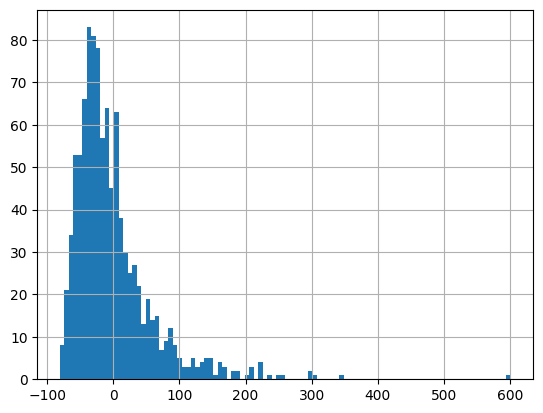

In [90]:
df['14atr%'].hist(bins=100);

# data is skewed right, normalization is required

<Axes: >

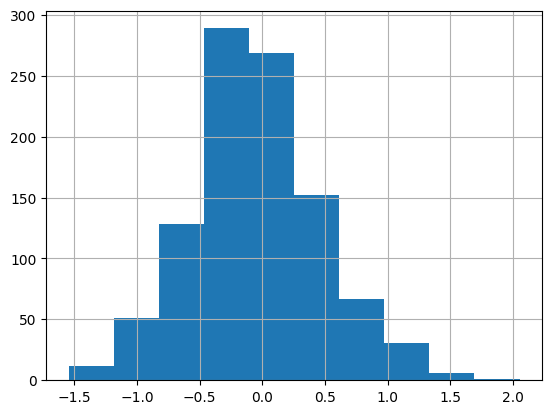

In [102]:
# One of the options to deal with right skewness is log transformation
# to be decided later ...

df['14atr%'].apply(lambda x: np.log(x+100)-4.5).hist()


In [104]:
# CANDLE INFORMATION EXTRACTION
# up-wick
# body
# down-wick

In [116]:
def percentage(f, t):
    return (t/f - 1) * 100

def upwick(d):
    return percentage(max(d['open'], d['close']), d['high'])

def downwick(d):
    return percentage(min(d['open'], d['close']), d['high'])
    


high = df['high']
open = df['open']
close = df['close']
low = df['low']


df['upwick'] = df.apply(upwick, axis=1)
df['body'] = percentage(open, close)
df['downwick'] = df.apply(downwick, axis=1)

# ratio of upwick-body, downwick-body features? may be to be considered

In [125]:
# VOLUME MOVING AVERAGE

# simple volume moving average
# most tracked volume moving averages are: [10, 20, 50]
# ex. 20 days volume moving average. later, we will create columns for each period
df['20vsma'] = df['volume'].rolling(window=20).mean()

In [127]:
# how far we are extended from simple volume moving average, compared to todays volume
df['20vsma%'] = round((df['volume'] - df['20vsma']) / df['20vsma'] * 100, 2)
df

,time,open,high,low,close,volume,tr0,tr1,tr2,tr,...,7atr,10atr,20atr,30atr,14atr%,body,upwick,downwick,20vsma,20vsma%
0,2021-05-16,0.000347,0.000372,0.000335,0.000341,108.70,0.000036,NaN,NaN,0.000036,...,0.000036,0.000036,0.000036,0.000036,0.00,-1.822107,6.980426,8.965901,NaN,NaN
1,2021-05-17,0.000341,0.000345,0.000324,0.000333,78.02,0.000022,0.000004,0.000017,0.000022,...,0.000034,0.000035,0.000036,0.000036,-38.31,-2.390858,1.192499,3.671129,NaN,NaN
2,2021-05-18,0.000333,0.000435,0.000326,0.000420,191.64,0.000110,0.000102,0.000008,0.000110,...,0.000045,0.000042,0.000039,0.000038,170.56,25.953053,3.753575,30.680795,NaN,NaN
3,2021-05-19,0.000420,0.000421,0.000272,0.000320,172.65,0.000149,0.000001,0.000148,0.000149,...,0.000060,0.000053,0.000045,0.000042,208.55,-23.819057,0.336050,31.707546,NaN,NaN
4,2021-05-20,0.000321,0.000336,0.000289,0.000319,71.39,0.000047,0.000016,0.000031,0.000047,...,0.000058,0.000052,0.000045,0.000042,-2.43,-0.371121,4.662404,5.052276,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2024-02-11,0.000731,0.000760,0.000723,0.000728,19.62,0.000037,0.000028,0.000009,0.000037,...,0.000042,0.000046,0.000058,0.000062,-28.25,-0.437577,3.965541,4.422469,25.8850,-24.20
1002,2024-02-12,0.000728,0.000744,0.000705,0.000737,27.62,0.000039,0.000016,0.000023,0.000039,...,0.000042,0.000046,0.000057,0.000061,-23.80,1.236434,0.936355,2.184366,24.4940,12.76
1003,2024-02-13,0.000736,0.000743,0.000696,0.000697,22.18,0.000047,0.000006,0.000041,0.000047,...,0.000042,0.000046,0.000056,0.000061,-7.96,-5.327535,0.951345,6.632214,23.2975,-4.80
1004,2024-02-14,0.000697,0.000707,0.000670,0.000684,30.96,0.000037,0.000010,0.000027,0.000037,...,0.000042,0.000045,0.000055,0.000060,-26.40,-1.879214,1.362789,3.304094,24.1475,28.21


<Axes: >

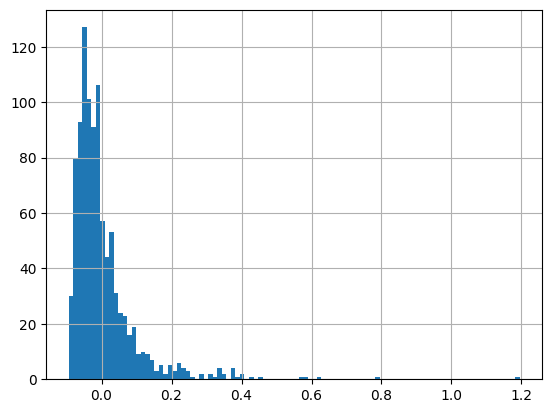

In [130]:
(df['20vsma%']/1000).hist(bins=100)

In [131]:
# VWMA - Volume Weighted Moving Average
def vwma(prices, volumes, window):
    """
    Calculate the Volume Weighted Moving Average (VWMA).
    
    Parameters:
        prices (pandas.Series): Series of prices.
        volumes (pandas.Series): Series of volumes.
        window (int): Window size for the moving average.
    
    Returns:
        pandas.Series: Volume Weighted Moving Average (VWMA) values.
    """
    # Calculate typical price
    typical_price = (prices * volumes).sum() / volumes.sum()
    
    # Calculate VWMA
    vwma_values = pd.Series(index=prices.index)
    for i in range(len(prices) - window + 1):
        vwma_values.iloc[i + window - 1] = (prices.iloc[i:i+window] * volumes.iloc[i:i+window]).sum() / volumes.iloc[i:i+window].sum()
    
    return vwma_values

In [133]:
df['10vwma'] = vwma(df['close'], df['volume'], window=10)

In [138]:
# how far we are extended from vwma, compared to todays price
df['10vwma%'] = round((df['close'] - df['10vwma']) / df['10vwma'] * 100, 2)
df.sample(5)

,time,open,high,low,close,volume,tr0,tr1,tr2,tr,...,20atr,30atr,14atr%,body,upwick,downwick,20vsma,20vsma%,10vwma,10vwma%
471,2022-08-30,0.000079,0.000080,0.000076,0.000077,5.30,0.000004,1.100000e-06,0.000003,0.000004,...,0.000007,0.000007,-40.54,-2.781290,1.517067,4.421326,32.7940,-83.84,0.000083,-6.80
759,2023-06-14,0.000233,0.000243,0.000231,0.000235,30.50,0.000012,1.070000e-05,0.000001,0.000012,...,0.000019,0.000019,-37.74,0.989247,3.449744,4.473118,36.4345,-16.29,0.000246,-4.52
230,2022-01-01,0.000178,0.000180,0.000175,0.000179,7.41,0.000006,1.900000e-06,0.000004,0.000006,...,0.000015,0.000016,-56.87,0.336700,0.894855,1.234568,13.3210,-44.37,0.000183,-2.28
333,2022-04-14,0.000135,0.000136,0.000132,0.000132,2.84,0.000004,9.000000e-07,0.000003,0.000004,...,0.000011,0.000012,-61.65,-1.780415,0.593472,2.416918,13.7270,-79.31,0.000141,-5.88
160,2021-10-23,0.000208,0.000215,0.000206,0.000207,12.57,0.000009,7.000000e-06,0.000002,0.000009,...,0.000020,0.000021,-51.98,-0.911271,3.309353,4.259439,28.8060,-56.36,0.000204,1.31


<Axes: >

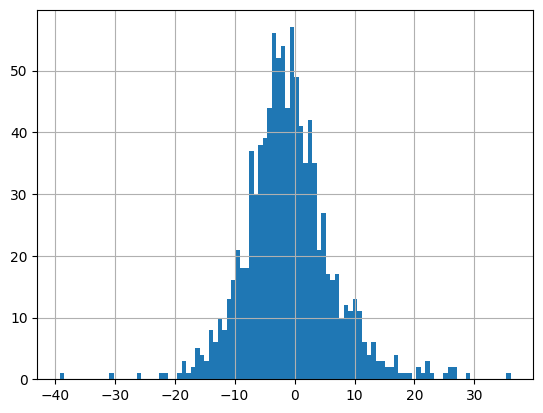

In [139]:
df['10vwma%'].hist(bins=100)